#### Visualizing data from the Panama papers. Start by looking for outliers in the data (nodes >3 sigma more frequent than other nodes). Then search for information about these nodes to determine the entities, addresses, officers and intermediaries with the most anomolous activity.

### Insight: Find most anomolous activity comes from companies that are still active, were founded in the 2000s, with entities in the Virgin Islands and officers and intermediaries in Hong Kong, Switzerland and the UK. By far the largest outlier in the database is a company called 'Portcullis Trustnet', which has edges with ~3% of the entries in the database!

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Load nodes in edges, and then information about entities, addresses, intermediaries and officers with their node information

In [2]:
entities = pd.read_csv('data/offshore_leaks_csvs-20160621/Entities.csv')
addresses = pd.read_csv('data/offshore_leaks_csvs-20160621/Addresses.csv')
intermediaries = pd.read_csv('data/offshore_leaks_csvs-20160621/Intermediaries.csv')
officers = pd.read_csv('data/offshore_leaks_csvs-20160621/Officers.csv')
edges = pd.read_csv('data/offshore_leaks_csvs-20160621/all_edges.csv')

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (1,2,5,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


#### Look at distribution of nodes. See that there are some clear outliers, with a lot of clustering

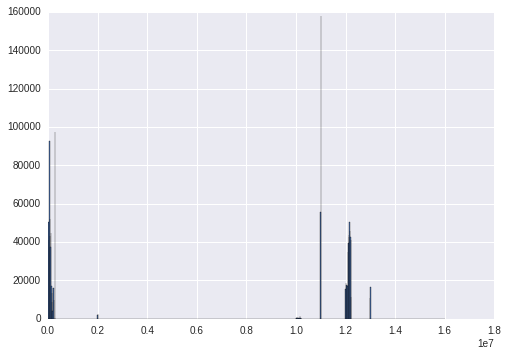

In [3]:
full_node1s = edges['node_1'].hist(bins=numpy.linspace(0,16000000,1000))

In [4]:
df = edges['node_1']

#### Plot distribution of frequency of node1 nodes. See that frequency is less than 45 within 3 sigma. Maximum value was -- 36373??!!!

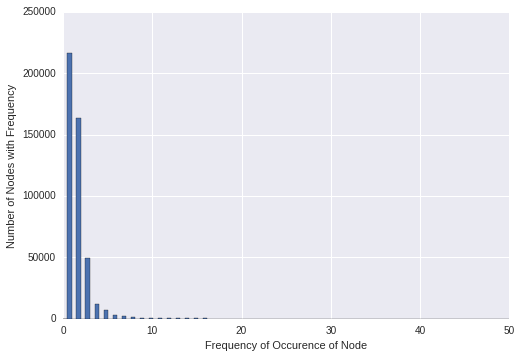

In [5]:
node1_counts = df.value_counts()
plt.hist(node1_counts,bins=numpy.linspace(0,50,100))
plt.xlabel('Frequency of Occurence of Node')
plt.ylabel('Number of Nodes with Frequency')

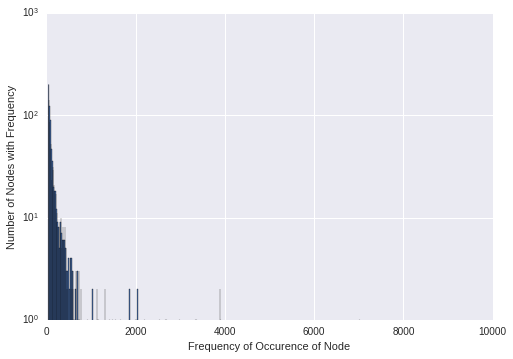

In [6]:
plt.hist(node1_counts[node1_counts>50],bins=numpy.linspace(50,10000,1000),log=True)
plt.xlabel('Frequency of Occurence of Node')
plt.ylabel('Number of Nodes with Frequency')

In [7]:
print max(node1_counts),len(node1_counts[node1_counts>45]),len(node1_counts)
print float(len(node1_counts[node1_counts>45]))/float(len(node1_counts))
print numpy.percentile(node1_counts,99.7)

36373 1373 462468
0.00296885406125
45.0


#### Plot distribution of frequency of node2 nodes. See that frequency is less than 20 within 3 sigma. Maximum value was -- 37338??!!!

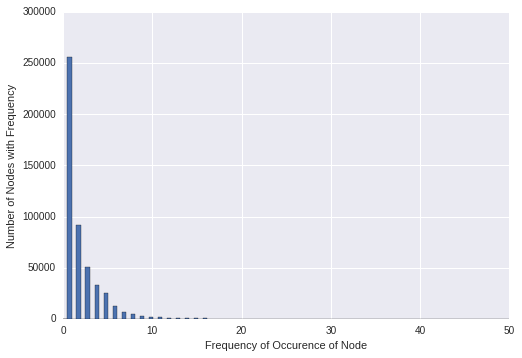

In [8]:
df2 = edges['node_2']
node2_counts = df2.value_counts()
plt.hist(node2_counts,bins=numpy.linspace(0,50,100))
plt.xlabel('Frequency of Occurence of Node')
plt.ylabel('Number of Nodes with Frequency')

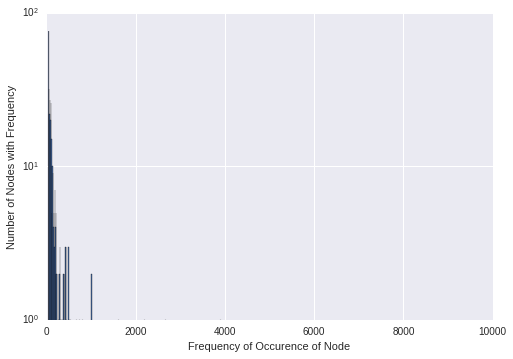

In [9]:
plt.hist(node2_counts[node2_counts>50],bins=numpy.linspace(50,10000,1000),log=True)
plt.xlabel('Frequency of Occurence of Node')
plt.ylabel('Number of Nodes with Frequency')

In [10]:
print max(node2_counts),len(node2_counts[node2_counts>20]),len(node2_counts)
print float(len(node2_counts[node2_counts>20]))/float(len(node2_counts))
print numpy.percentile(node2_counts,99.7)

37338 1463 492143
0.00297271321547
20.0


#### Get node1 and node2 list for all nodes above 3 sigma

In [11]:
new_node1 = list(node1_counts[:1373].keys())
new_node2 = list(node2_counts[:1463].keys())

#### Filter events that have nodes in the list of >3 sigma nodes. Notice that entities and addresses are always node1, intermediaries are always node2, and officers can be node1 or node2 

In [12]:
new_entities1 = entities[entities['node_id'].isin(new_node1)]
new_entities2 = entities[entities['node_id'].isin(new_node2)]

In [13]:
len(entities),len(new_entities1),len(new_entities2)

(319150, 0, 767)

In [14]:
new_addresses1 = addresses[addresses['node_id'].isin(new_node1)]
new_addresses2 = addresses[addresses['node_id'].isin(new_node2)]

In [15]:
len(addresses),len(new_addresses1),len(new_addresses2)

(151054, 0, 496)

In [16]:
new_ints1 = intermediaries[intermediaries['node_id'].isin(new_node1)]
new_ints2 = intermediaries[intermediaries['node_id'].isin(new_node2)]

In [17]:
len(intermediaries),len(new_ints1),len(new_ints2)

(23636, 965, 0)

In [18]:
new_offs1 = officers[officers['node_id'].isin(new_node1)]
new_offs2 = officers[officers['node_id'].isin(new_node2)]

In [19]:
len(officers),len(new_offs1),len(new_offs2)

(345594, 427, 200)

#### 1392 matches for node1 and 1463 matches for node2 -> Some officers are intermediaries, but no addresses are entities

In [20]:
import datetime
dates = pd.to_datetime(new_entities2['incorporation_date']).dt.year

#### Anomolous companies mostly created in the 2000s

In [21]:
date_count = dates.value_counts()[:10]
print [str(i) for i in date_count.index],date_count
sns.barplot(x=['FY'+str(i) for i in date_count.index],y=date_count,data=df3)

['2000', '2006', '2004', '2008', '2003', '2007', '2005', '1999', '1997', '1994'] 2000    56
2006    56
2004    55
2008    50
2003    47
2007    47
2005    45
1999    39
1997    36
1994    31
dtype: int64


NameError: name 'df3' is not defined

#### Anomolous companies mostly still operating

In [ ]:
stat = new_entities2['status']
stat_count = stat.value_counts()[:5]
sns.barplot(x=[str(i)[:7] for i in stat_count.index],y=stat_count)

#### Look at top five countries with entities that have anomolous behavior -> British Virgin Islands first, followed by Switzerland, followed by Hong Kong. If we look at intermediaries and officers that then becomes mostly Hong Kong, Switzerland and the UK

In [ ]:
countries = new_entities2['countries']
country_count = countries.value_counts()[:5]
sns.barplot(x=country_count.index,y=country_count)

In [ ]:
countries = new_ints1['countries']
country_count = countries.value_counts()[:5]
sns.barplot(x=country_count.index,y=country_count)

#### See that the most extreme outlier is a company called 'Portcullis TrustNet'

In [ ]:
max_node1 = list(node1_counts[:5].keys())
max_node2 = list(node2_counts[:5].keys())
max_address = addresses[addresses['node_id'].isin(max_node2)]
print'1:','Counts',int(node1_counts[:1]),'Address',max_address['address'][max_address['node_id']==236724]
print '2:','Counts',int(node1_counts[1:2]),'Address',max_address['address'][max_address['node_id']==288469]
print '3:','Counts',int(node1_counts[2:3]),'Address',max_address['address'][max_address['node_id']==285729]
print '4:','Counts',int(node1_counts[3:4]),'Address',max_address['address'][max_address['node_id']==264051]
print '5:','Counts',int(node1_counts[4:5]),'Address',max_address['address'][max_address['node_id']==279944]

#### What companies are associated with Portcullis TrustNet?

In [ ]:
new_edges = edges[edges['node_2'].isin(max_node2)]

#### ~3% of edges are associated with Portcullis TrustNet!

In [ ]:
print len(new_edges),len(edges),float(len(new_edges))/float(len(edges))

In [ ]:
port_node1 = list(new_edges['node_1'])
port_entities = new_entities2[new_entities2['node_id'].isin(port_node1)]

#### Entities connected to Portcullis TrustNet exist almost exclusively in the British Virgin Islands

In [ ]:
countries = port_entities['countries']
country_count = countries.value_counts()[:5]
print country_count
sns.barplot(x=[str(i)[:23] for i in country_count.index],y=country_count)